# Importing libaries

In [3]:
import glob
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']="Avenir"
import seaborn as sns
from collections import Counter

# Defining functions to be used in this notebook

In [4]:
def convert_to_mins(string):
    if isinstance(string, float):
        return None
    a=string.split(' ')
    
    if len(a)==4:
        duration_in_min = int(a[0])*60 + int(a[2])
        
    elif (len(a)==2) and (a[1]=='m'):
        duration_in_min = int(a[0])
        
    elif (len(a)==2) and (a[1]=='h'):
        duration_in_min = int(a[0])*60
        
    elif (len(a)==1) and (a[0]=='Multi-day') :
        duration_in_min = 1500
        
    else:
        duration_in_min = None
        
    return duration_in_min

In [5]:
def convert_to_miles(string):
    if isinstance(string, float):
        return None
    
    a=string.split(' ')
    if (len(a)==2) and (a[1]=='mi'):
        distance = float(a[0])
    else:
        distance = None
    return distance

In [6]:
def number_of_tags(lst):
    return len(lst.split(','))

In [7]:
def number_of_words(string):
    return (len(string))

In [8]:
def difficulty(string):
    if string =='easy':
        return 1
    elif string == 'moderate':
        return 2
    elif string=='hard':
        return 3
    else:
        return -1

In [9]:
def is_there(string):
    if NaN:
        return 0
    else:
        return 1

In [10]:
def code_generator(name):
    return us_state_abbrev[name.replace('-', ' ').title()]

In [11]:
def gen_tag_list(string):
    return eval(string)

In [12]:
us_state_abbrev = {
'Alabama': 'AL',
'Alaska': 'AK',
'American Samoa': 'AS',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'District of Columbia': 'DC',
'Florida': 'FL',
'Georgia': 'GA',
'Guam': 'GU',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Northern Mariana Islands':'MP',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Puerto Rico': 'PR',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virgin Islands': 'VI',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY'
}

# Merging two csv files fore each state

Trail information for each state is saved in 2 csv files. We will first combine the 2 csv files:

In [25]:
path1 ='/Users/eunheelim/Capstone1/data4/*.csv'
path2 = '/Users/eunheelim/Capstone1/data5/*.csv'

filelist1=sorted(glob.iglob(path1))
filelist2=sorted(glob.iglob(path2))

df = pd.DataFrame() 

for file in filelist1:
    state = file[33:-4]
    file2 =  '/Users/eunheelim/Capstone1/data5/' + state + '2.csv'
    
    df1 = pd.read_csv(file,
                  header=None,
                  names=['duration', 'distance'])

    df2 = df2 = pd.read_csv(file2,
                 index_col='Unnamed: 0')
    
    df0= df2.join(df1)
    df0['state'] = state
    
    df= df.append(df0)

In [26]:
df["State"] = df['state'].apply(code_generator)

# Data engineering on the data frame

In [28]:
df['difficulty_rating'] = df['difficulty'].apply(difficulty)
df['short'] = df['short_description'].apply(number_of_words)
df['long'] = np.where(df['long_description'].isna(), 0, 1)
df['n_tags'] = df['tag_list'].apply(number_of_tags)

df['distance_mi']= df['distance'].apply(convert_to_miles)
df['duration_min']= df['duration'].apply(convert_to_mins)

df= df.drop(columns={'distance', 'duration','best_rating','worst_rating','difficulty'})

# Changing column names
df= df.rename(columns={"average_rating": "stars", "difficulty_rating":"difficulty", "distance_mi":'distance',"duration_min":"duration"})

In [29]:
df.head()

,name,stars,review_count,location,elevation,route_type,short_description,long_description,tag_list,n_photos,n_recordings,n_completed,state,State,difficulty,short,long,n_tags,distance,duration
0,Walls of Jericho Trail,4.5,908,"Scottsboro, Alabama",1699.0,Out & Back,Walls of Jericho Trail is a 9 mile heavily tra...,NaN,"['Dog friendly', 'Camping', 'Hiking', 'Horseba...",1507,599,1622,alabama,AL,3,296,0,17,9.0,277.0
1,Cave Creek Trail from Cheaha Trailhead,4.5,486,Cheaha State Park,1105.0,Loop,Cave Creek Trail from Cheaha Trailhead is a 6....,Offline map recommended. Users have reported t...,"['Dogs on leash', 'Backpacking', 'Camping', 'H...",1133,471,892,alabama,AL,2,325,1,10,6.7,207.0
2,Sougahoagdee Falls,4.5,372,William B Bankhead National Forest,436.0,Out & Back,Sougahoagdee Falls is a 4 mile heavily traffic...,NaN,"['Dogs on leash', 'Kid friendly', 'Hiking', 'N...",395,255,506,alabama,AL,1,279,0,10,4.0,102.0
3,Cane Creek Canyon Nature Preserve,5.0,236,Cane Creek Canyon Nature Preserve,974.0,Loop,Cane Creek Canyon Nature Preserve is a 8.2 mil...,Privately owned scenic natural area open to th...,"['Dog friendly', 'Camping', 'Hiking', 'Nature ...",582,163,372,alabama,AL,2,291,1,14,8.2,238.0
4,Chinnabee Silent Trail,4.5,308,Cheaha Wilderness,892.0,Out & Back,Chinnabee Silent Trail is a 7.3 mile heavily t...,Note: Users have reported that the trailhead f...,"['Dogs on leash', 'Backpacking', 'Camping', 'F...",491,247,690,alabama,AL,2,307,1,19,7.3,212.0


In [31]:
df.to_csv('csv/combined/all_state_trails.csv', index=False)

In [32]:
CA = df[df['State']=='CA']

In [35]:
CA.to_csv('csv/combined/CA_trails.csv', index=False)

In [39]:
def save_state_trail_CSV(state):
    result = df[df['State']==state]
    result.to_csv(f'csv/combined/{state}_trails.csv', index = False)
    print(result.shape)

In [41]:
save_state_trail_CSV('AZ')

(1000, 20)


## Number of reviews for trails

In [ ]:
df = df[df['duration']<1500]
df = df[df['review_count']!=0]

In [15]:
reviews = df[['name', 'review_count','State']]

In [16]:
reviews['count']=1

<ipython-input-16-3799b4fe5161>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['count']=1


In [17]:
reviews.head()

,name,review_count,State,count
0,Walls of Jericho Trail,908,AL,1
1,Cave Creek Trail from Cheaha Trailhead,486,AL,1
2,Sougahoagdee Falls,372,AL,1
3,Cane Creek Canyon Nature Preserve,236,AL,1
4,Chinnabee Silent Trail,308,AL,1


In [18]:
state_review = reviews.groupby('State').sum().sort_values('review_count', ascending=False)

In [19]:
state_review.columns

Index(['review_count', 'count'], dtype='object')

In [20]:
state_review['avg review per trail'] = state_review['review_count']/state_review['count']

In [21]:
state_review = state_review.sort_values('avg review per trail', ascending=False)

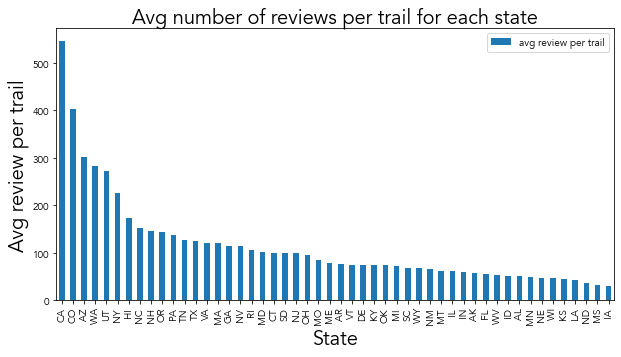

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

state_review.plot.bar(y= 'avg review per trail', ax=ax)
ax.set_title('Avg number of reviews per trail for each state', fontsize = 20)
ax.set_ylabel('Avg review per trail', fontsize =20)
ax.set_xlabel('State', fontsize =20)
plt.show()

In [23]:
CA = df[df['State']=='CA']

In [24]:
CA.shape

(985, 20)

In [160]:
CA.tail()

,name,stars,review_count,location,elevation,route_type,short_description,long_description,tag_list,n_photos,n_recordings,n_completed,state,difficulty,short,long,n_tags,distance,duration,State
995,"Three Lakes (Angela, Flora and Azalea) via Don...",4.5,204,Tahoe National Forest,367.0,Out & Back,"Three Lakes (Angela, Flora and Azalea) via Don...",Note: off line map is recommended to get orien...,"['Dogs on leash', 'Kid friendly', 'Hiking', 'N...",529,186,340,california,2,390,1,12,3.9,94.0,CA
996,Bull Creek Flats Trail,4.5,169,Bull Creek State Wilderness,636.0,Loop,Bull Creek Flats Trail is a 7.4 mile moderatel...,The full loop can only be hiked in the summer ...,"['Hiking', 'Horseback riding', 'Nature trips',...",324,160,311,california,2,312,1,12,7.4,204.0,CA
997,North Etiwanda Preserve Loop,4.5,218,North Etiwanda Preserve,603.0,Loop,North Etiwanda Preserve Loop is a 3.3 mile hea...,Please note: Do not park in the lower dirt lot...,"['Hiking', 'Nature trips', 'Walking', 'Running...",666,273,475,california,2,282,1,9,3.3,104.0,CA
998,Wildcat Peak Trail via Laurel Canyon and Sylva...,4.5,288,Tilden Regional Park,672.0,Loop,Wildcat Peak Trail via Laurel Canyon and Sylva...,"NOTE: As of September 2020, the beginning of t...","['Kid friendly', 'Hiking', 'Nature trips', 'Ru...",457,276,522,california,2,290,1,11,3.2,105.0,CA
999,Carriage Trail,4.5,292,"Redlands, California",295.0,Loop,Carriage Trail is a 4.9 mile heavily trafficke...,One of the trails in Redlands. Open all year ...,"['Dogs on leash', 'Kid friendly', 'Hiking', 'M...",278,293,342,california,1,303,1,11,4.9,130.0,CA


In [156]:
CA['review_count'].max()

5525

In [161]:
CA[CA['review_count']==5525]

,name,stars,review_count,location,elevation,route_type,short_description,long_description,tag_list,n_photos,n_recordings,n_completed,state,difficulty,short,long,n_tags,distance,duration,State
1,Potato Chip Rock via Mt. Woodson Trail,4.5,5525,Lake Poway Park,2112.0,Out & Back,Potato Chip Rock via Mt. Woodson Trail is a 7....,One of the most popular trails for photo ops a...,"['Dogs on leash', 'Hiking', 'Mountain biking',...",3161,4669,12558,california,2,308,1,13,7.6,242.0,CA


Text(0, 0.5, 'Trail count')

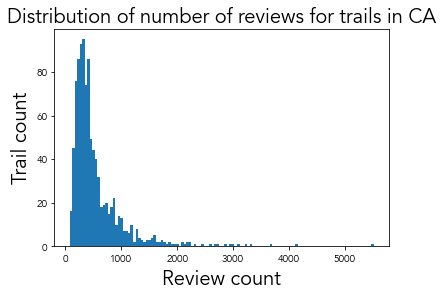

In [88]:
ax = CA['review_count'].plot.hist(bins=120)
ax.set_title('Distribution of number of reviews for trails in CA', fontsize = 20)
ax.set_xlabel('Review count', fontsize =20)
ax.set_ylabel('Trail count', fontsize =20)

In [89]:
top5 = ['CA', 'CO', 'AZ', 'WA','UT']

CA
CO
AZ
WA
UT


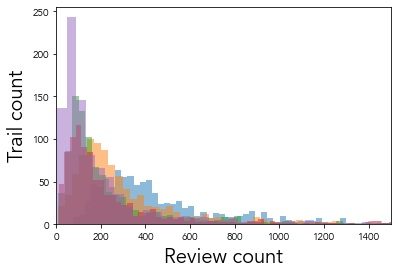

In [126]:
for item in top5:
    print(item)
    item = df[df['State']==item]
    ax = item['review_count'].plot.hist(bins=200, alpha=0.5)
    ax.set_xlabel('Review count', fontsize =20)
    ax.set_ylabel('Trail count', fontsize =20)
    ax.set_xlim(0,1500)